# Regression Analysis:

A linear regression can be having single features or multiple features, and can also be predicting a single value or predicting
multiple values (multivariate regression).

Regression with multiple features is represented as: 
    
$$f_{w,b}(X) =  w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + ... + w_{n-1}x_{n-1} \tag{1} $$   


Regression is a supervised learning technique that is used to predict a numerical value as the target. 
The goal of this notebook:
- To illustrate how data is prepared for a machine learning algorithm
- To Visualize data and gain valuable insights
- To select a model and train it
- To fine tune the model and present the solution

Overview of the dataset: 

<figure>
    <img src="califonia.png" width="600">
</figure>

- Plot the visualization above
- Plot the data using hex-bins
- Plot the data using Folium layers

Linear regression uses the gradient descent algorithm to minimize the cost function, that is, finding the optimal $w$ 
and $b$ parameters of the linear regression.

The cost function is represented as: 
    
$$J_{w,b} = \frac{1}{2m} \sum\limits_{1 = 0}^{m-1} (f_{\mathbf{w},b} (f_\mathbf{x}^{(i)}) - y^{(i)} )^2  \tag{2}$$   

Where $m$ is the number of training examples in the dataset, $w$ (gradient/slope) is the weights and $b$ is the bias (y-intercept)

The performance of linear regression can be measured using the root mean squared error (RMSE):
    
$$RMSE({X,h}) = \sqrt{\frac{1}{m} \sum_{i = 1}^{m} (h(x^{(i)})- y^{(i)})^2 }$$  

Where: 
- $m$ is the number of learning instances in the dataset
- $X$ is the matrix containing all the feature values of all the instances in the dataset
- $h$ is the predicted value also called $\hat{y}$
- $RMSE{(X,h)}$ is the cost function measured on the set of examples/instances using the pediction/hypothesis $\hat{y}$

Another performance metric that is useful when the dataset has a lot of outliers is known as the Mean Absolute Error.

$$MAE(X,h) = \frac{1}{m}\sum_{i=1}^m | h(x^{(i)}) - y^{(i)}|$$

### Getting the data

In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    ## create a directory if its not existsing
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    
fetch_housing_data()    

### Now fetch the dataset

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The 25%, 50% and 75% show the percentiles. For example, 25% of the districts have a housing_median_age of 18 and below.
50% are lower than 29 and 75% are lower than 37.

To get the feel of the data, we can also use a histrogram plot: 

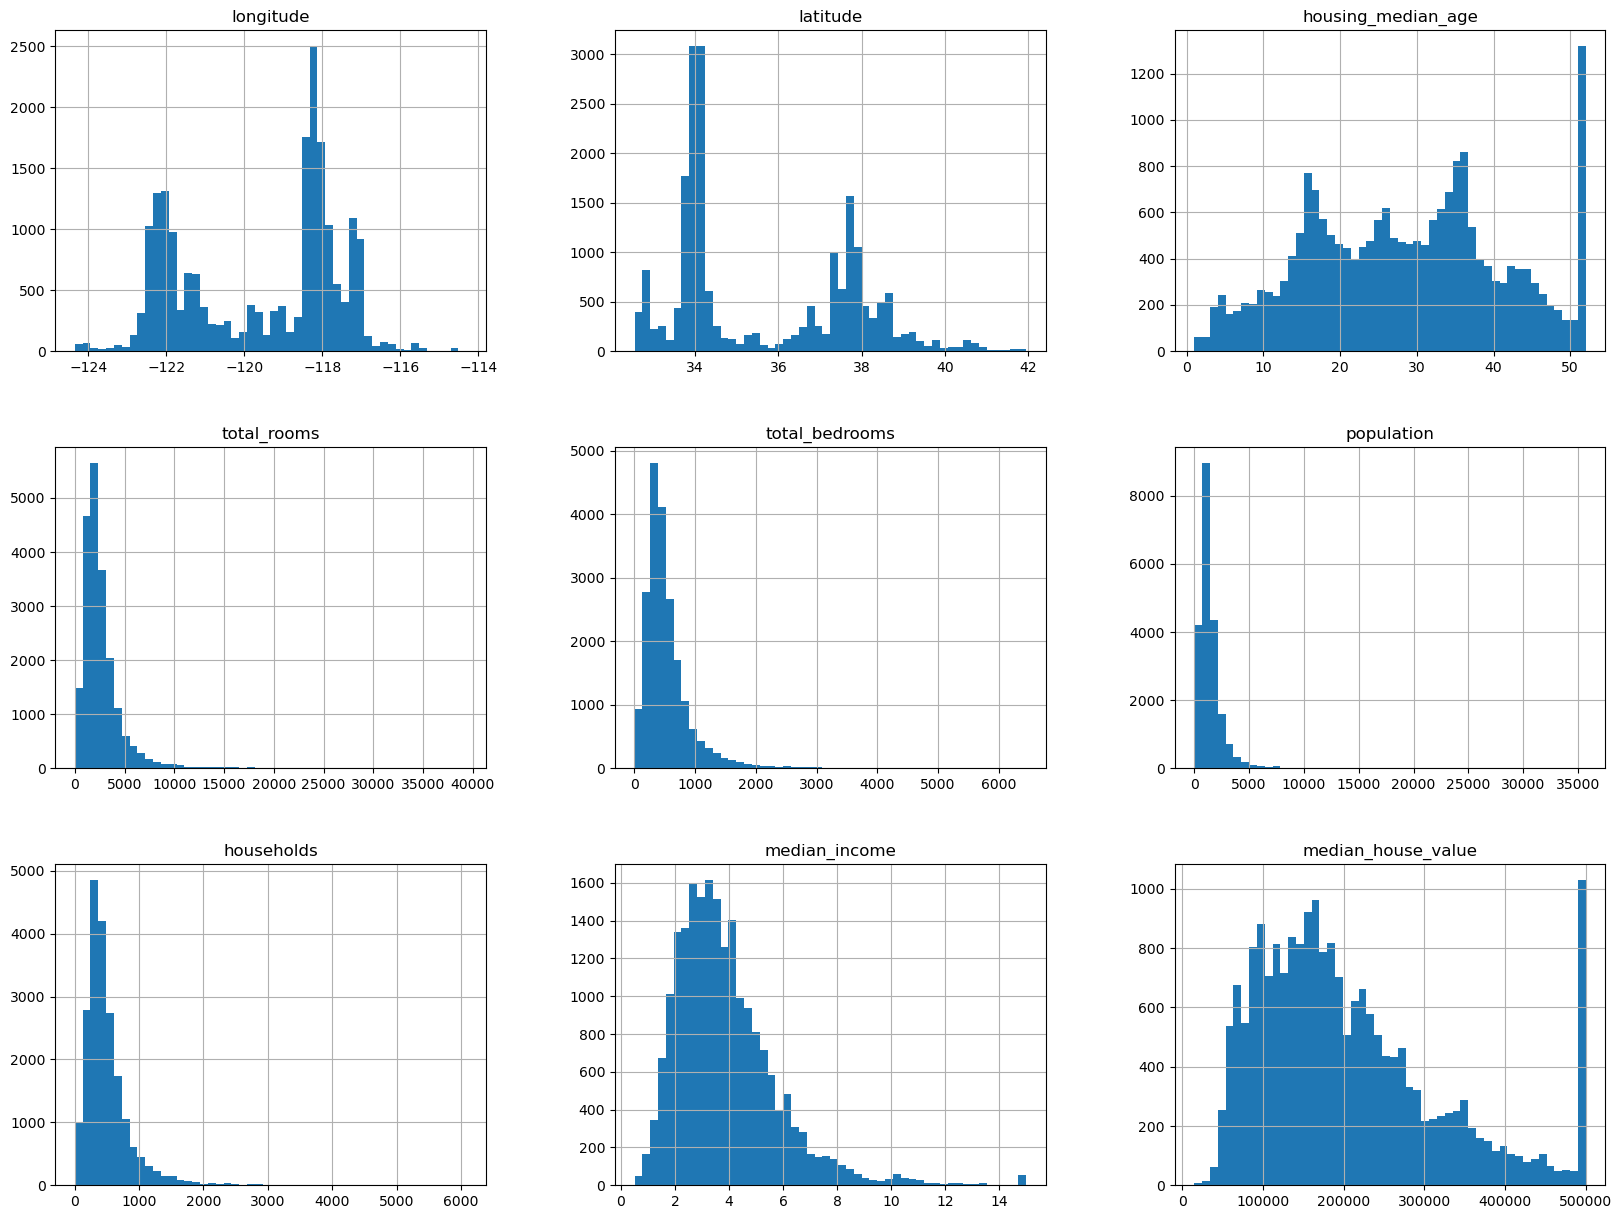

In [9]:
housing.hist(bins = 50, figsize=(20,15))
plt.show()

#### Distribution plots

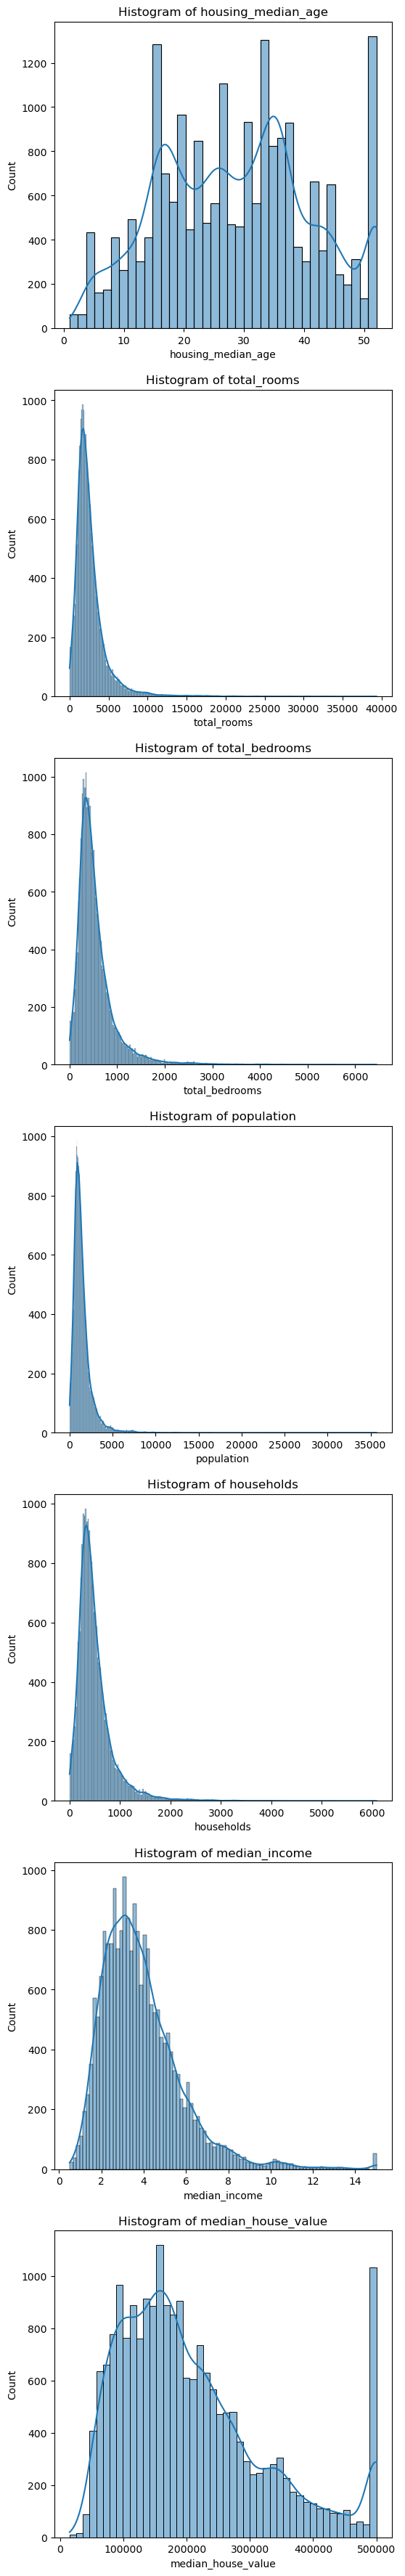

In [10]:

numerical_columns = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
num_cols = len(numerical_columns)
fig, ax = plt.subplots(nrows = num_cols, figsize=(6,45))

for i, col in enumerate(numerical_columns):
    sns.histplot(data = housing, x = col, kde=True, ax=ax[i])
    ax[i].set_title(f'Histogram of {col}')

#### Correlation plots

How are the variables related to each other? 

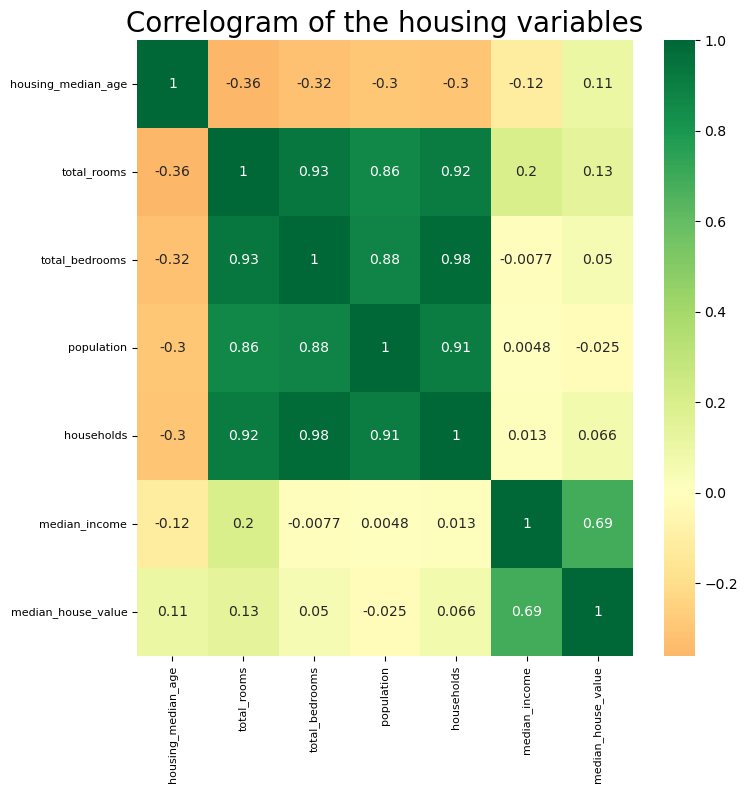

In [11]:
subset = housing[numerical_columns]
fig, ax = plt.subplots(1, figsize=(8,8))
sns.heatmap(subset.corr(), xticklabels = subset.corr().columns, yticklabels = subset.corr().columns, cmap = 'RdYlGn', center= 0, annot=True, ax=ax)
plt.title("Correlogram of the housing variables", fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

We can see that the target variable, meadian house value is strongly correlated with the median income, total rooms and housing median age.


We can also use a pair plot to illustrate the relationship between all the variables in the dataset: 

<Figure size 1200x1400 with 0 Axes>

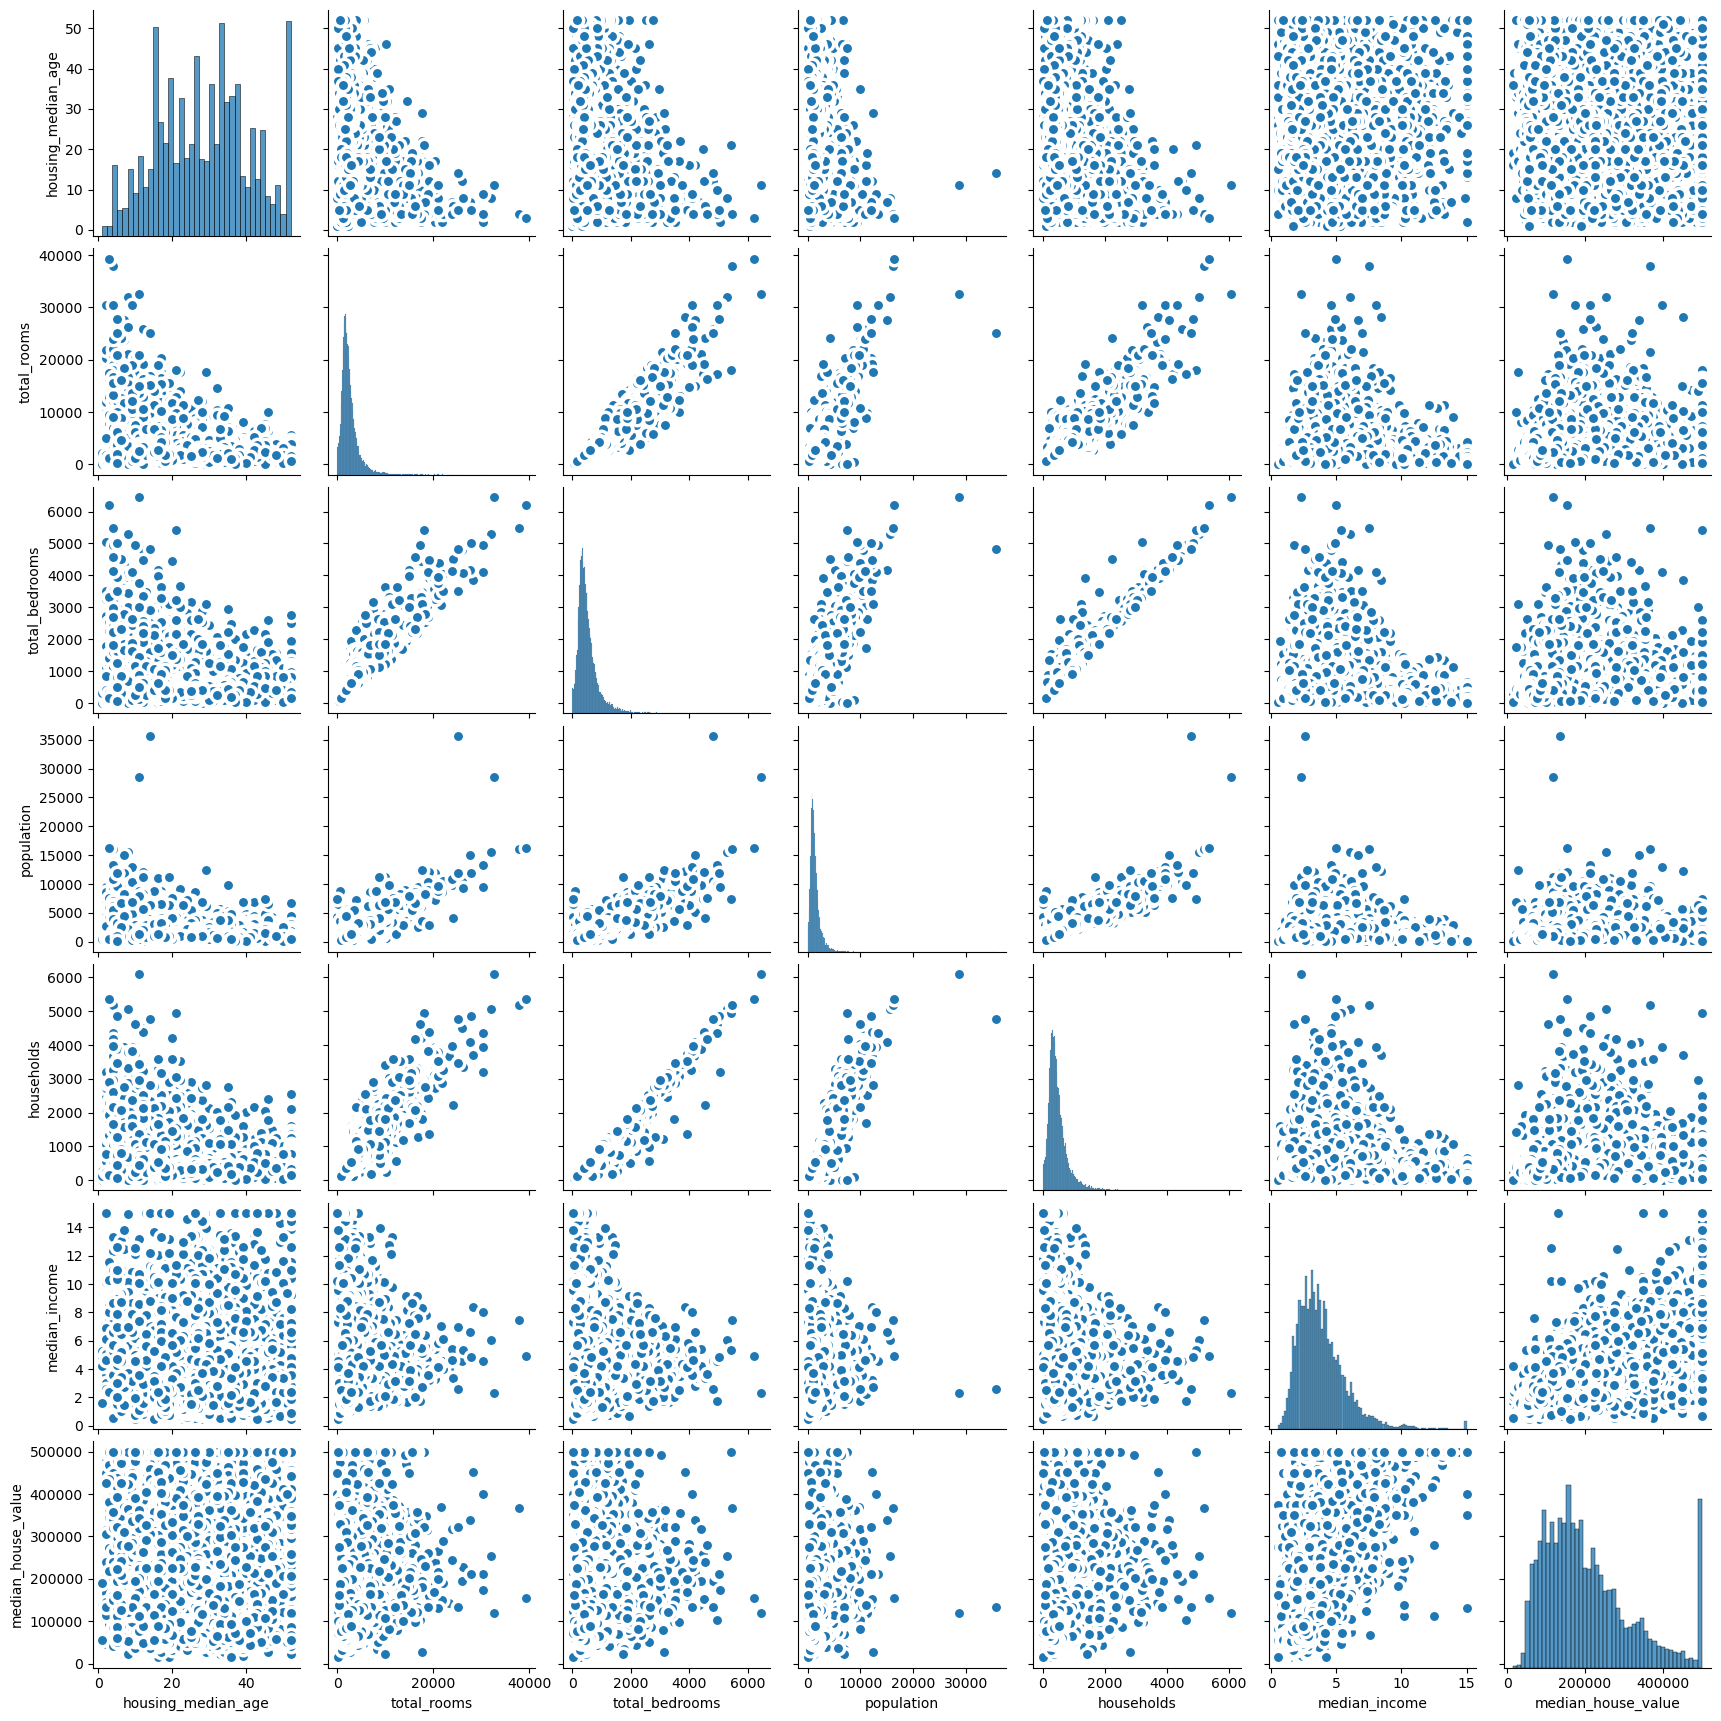

In [12]:
plt.figure(figsize=(12,14),dpi=100)
sns.pairplot(subset, kind="scatter", plot_kws=dict(s=80, edgecolor="white",linewidth=2.5))
plt.show()

## Creating a test set

Creating training data and test data is very important for a machine learning model.

We always want to avoid getting different training and testing datasets as this means that the models will know our data 
all too well, also known as data leakage.

One solution is to split the dataset on the first run and save the training data and the test dataset, so that they are loaded
separately.

Another solution of getting the same test dataset is using each instance's unique identifier to determine whether it goes into the training set
or the testing set.

In [14]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 **32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
housing_with_id = housing.reset_index() ## adds an index column to the dataframe

In [20]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In the implementation above, you have to make sure that the new data gets appended to the end of the dataset, and no
row ever gets deleted

Another approach to splitting data is known as stratified sampling. This is done to make sure that the test data is representative
of the various categories in the whole dataset. This is important in classification tasks.

For regression, we want to make sure to create an income category attribute first, because we have established that median
income is a very important attribute to predict median housing prices.

In [24]:
housing["income_cat"] = pd.cut(housing["median_income"],bins = [0.,1.5,3.0,4.5,6.0, np.inf], labels = [1,2,3,4,5])

<Axes: >

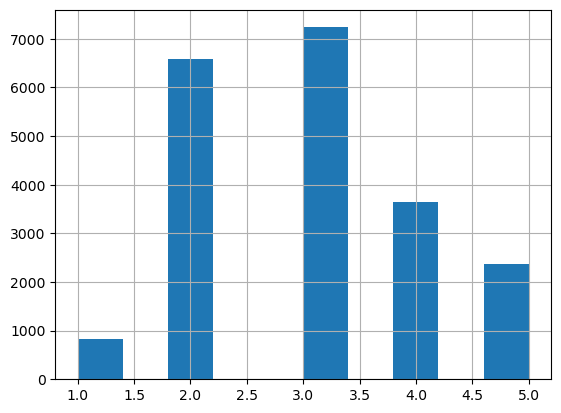

In [25]:
housing["income_cat"].hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#### Save the training set and the testing set once and for all

In [37]:
training_data = strat_train_set.to_csv("training.csv")
test_data =  strat_test_set.to_csv("test.csv")

#### Proportions of the income categories in the test set

In [29]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [35]:
(housing["income_cat"].value_counts() / housing.shape[0] ) * 100

3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: income_cat, dtype: float64

In [36]:
### Restore the original dataframe

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

### Exploratory Data Visualization

Exploration should be done on the training set

In [38]:
housing = strat_train_set.copy()

#### Scatter plot

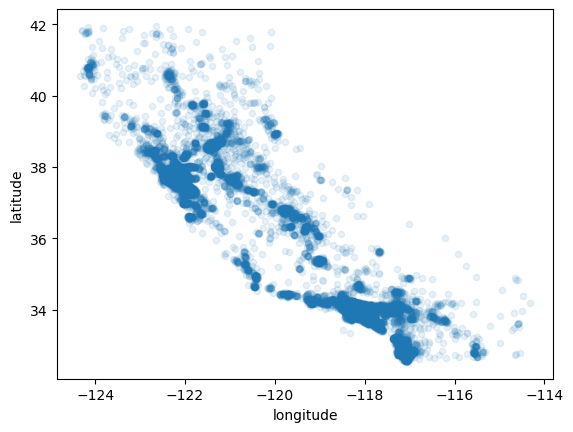

In [40]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
plt.show()

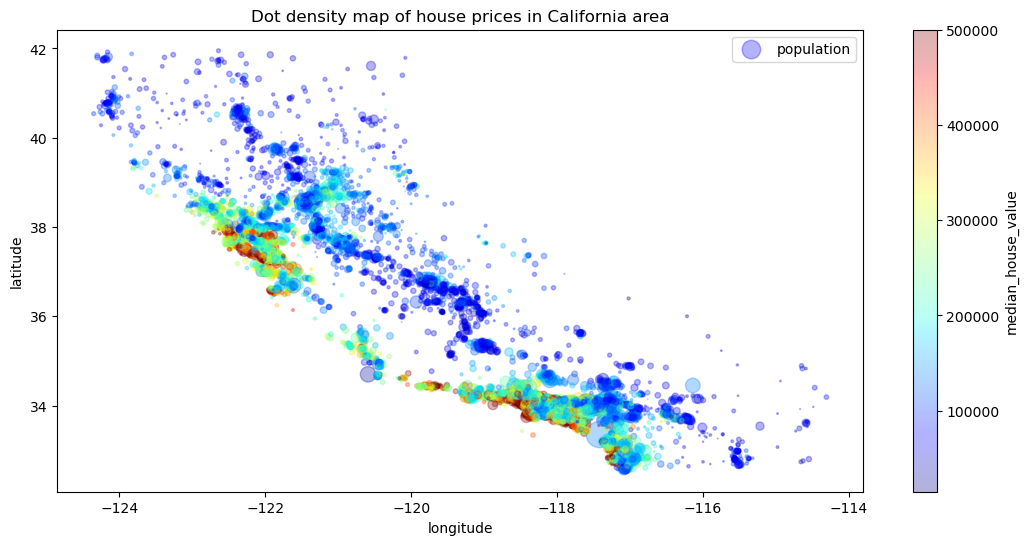

In [55]:
housing.plot(kind="scatter",x="longitude",y="latitude",
             alpha=0.3,s=housing["population"]/100, label="population",figsize=(13,6),
             c="median_house_value",cmap=plt.get_cmap("jet"),
             colorbar=True
            )
plt.title("Dot density map of house prices in California area")
plt.legend()
plt.show()

#### Put the map into context: 

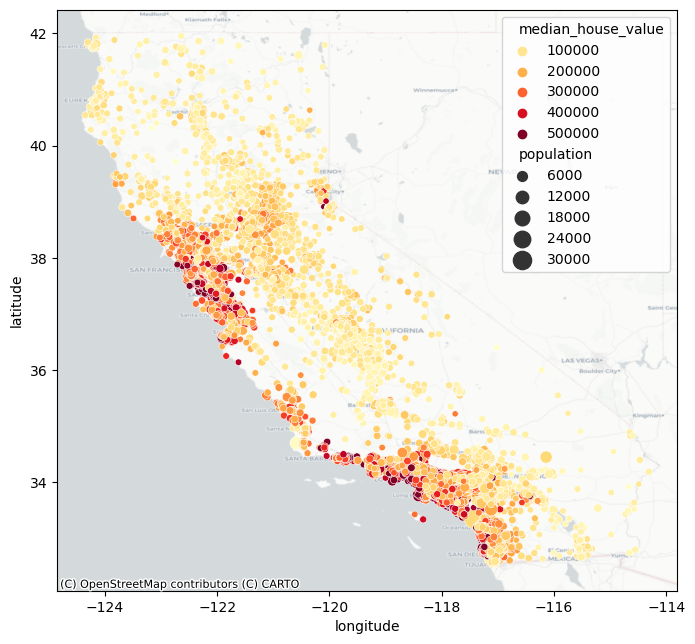

In [78]:
import contextily as cx

fig, ax = plt.subplots(1,1, figsize=(8,8))
joint = sns.scatterplot(data=housing, x = "longitude", y="latitude",hue = "median_house_value",
                        size="population",sizes=(20,200),
                        legend=True,palette="YlOrRd", ax=ax)

cx.add_basemap(joint,
              crs="EPSG:4326",
              source=cx.providers.CartoDB.Positron)

plt.show()

From the map above, the closer the house is to the beach, also greatly influences the price of the house, in addition to the
population of the general area.

Although houses in the northern area of California have an opposite inference as to the distance to the beach.